# <font color='red'> <div align='center'> Lojistik_Regresyon_ile_Siniflandirma


#### Lineer regresyonda bağımsız değişkenlerin parametreleri Ordinary Least Squares (OLS) yöntemiyle tahmin edilirken Lojistik regresyonda parametreler Maximum Likelihood (MLE) yöntemiyle hesaplanıyor. MLE yönteminin amacı sonsuz parametre havuzundan veri setinin görülme olasılığını maksimize eden en iyi parametreleri seçmek.

##### Bu ödevde, modelinizi kullanarak Titanic faciasında hayatta kalma durumunu tahmin edeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

##### Titanic verilerini Kaggle'dan indirin. Buradaki train.csv dosyasındaki veriler ihtiyacınızı görecektir.

##### Verilerinizi eğitim ve test kümelerine ayırın.

##### Modelinizi oluşturarak ayırdığınız test kümesindeki verilere göre hayatta kalma durumlarını tahmin edin.

##### Modelinizin performansı tatmin edici mi? Açıklayın.

##### Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın.

##### Lojistik Regresyon'un avantaj ve dezavantajlarını araştırın ve mentörünüzle tartışın.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Titanic verilerini Kaggle'dan indirin. Buradaki train.csv dosyasındaki veriler ihtiyacınızı görecektir.
import pandas as pd
titanic = pd.read_csv('data/titanic_data.csv') # id olsaydi "index_col=0" ekleyebilirdim.

In [3]:
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#titanic['Target']= titanic['Survived'].map({0:'Not Survived', 1:'Survived'}) *** Ileride bu sekilde de yapilabilir.
#titanic['Target'].head(15) *** 

In [5]:
titanic.drop('Cabin', inplace=True, axis=1)

In [6]:
total_missing_values = titanic.isnull().sum()
missing_values_per = titanic.isnull().sum()/titanic.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
null_values

,total_null,total_null_perc
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [7]:
titanic['Age']= titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked']= titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [8]:
titanic[titanic['Ticket'] == 113572]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [9]:
null_values

,total_null,total_null_perc
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [10]:
titanic[titanic['PassengerId'] == 62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S


In [11]:
titanic['Embarked']= titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [12]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [13]:
total_missing_values = titanic.isnull().sum()
missing_values_per = titanic.isnull().sum()/titanic.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
null_values

,total_null,total_null_perc
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
corr_matrix = titanic.corr()
corr_list =  corr_matrix.Survived.abs().sort_values(ascending=False).index[1:]

Text(0.5, 1.0, 'Correlation Matrix')

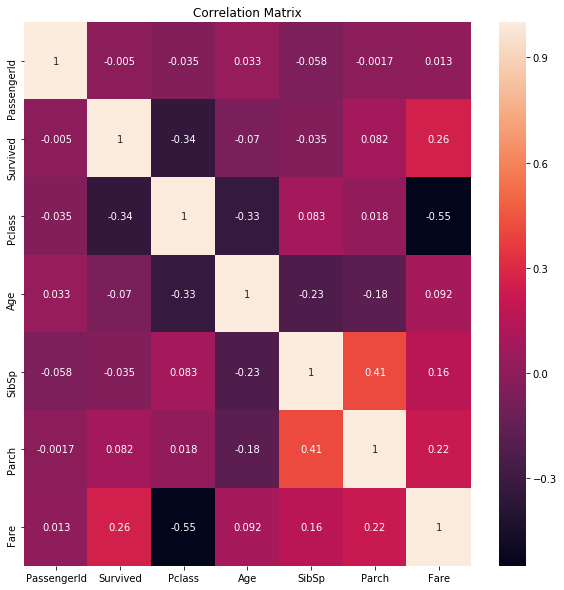

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')

(0, 10)

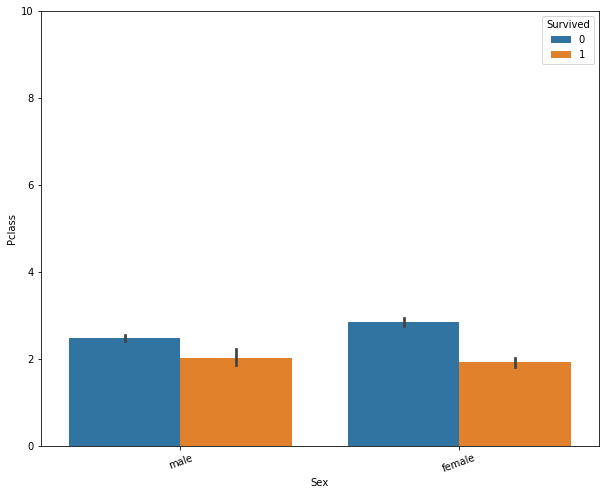

In [17]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(x="Sex", y="Pclass", hue="Survived", data=titanic)
plt.xticks(rotation=20)
plt.ylim((0,10))

### Numeriklerle Lojistik Regression 

In [19]:
X = titanic[corr_list]
y = titanic.Survived  ##y = titanic.iloc[:,1].values

#### One vs Rest

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
egitim_dogruluk = lr.score(X_train, y_train)
test_dogruluk = lr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.71
Modelin test verisindeki doğruluğu   : 0.68


In [26]:
from sklearn.metrics import accuracy_score

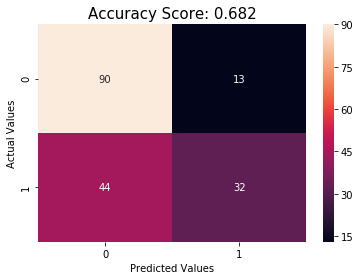

In [28]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [29]:
y_pred = lr.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm


array([[90, 13],
       [44, 32]], dtype=int64)

In [38]:
print("Doğruluk Oranı: %",((90+32) /179)*100)

Doğruluk Oranı: % 68.15642458100558


#### Multinomial (Softmax)

In [39]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)
egitim_dogruluk = log_reg_mnm.score(X_train, y_train)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.71
Modelin test verisindeki doğruluğu   : 0.70


C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [40]:
y_pred = log_reg_mnm.predict(X_test)

In [41]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[93, 10],
       [44, 32]], dtype=int64)

In [42]:
print("Doğruluk Oranı: %",((93+31) /179)*100)

Doğruluk Oranı: % 69.27374301675978


### <font color = 'red'> Kategoriklerle Logistic Regression 

In [43]:
df_dummies.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Tum kategoriklerle

In [58]:
X = df_dummies.drop(['Survived'], axis=1)
y = df_dummies.Survived 

#### One vs Rest

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_pred = lr.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm


array([[88, 15],
       [17, 59]], dtype=int64)

In [64]:
egitim_dogruluk = lr.score(X_train, y_train)
test_dogruluk = lr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.92
Modelin test verisindeki doğruluğu   : 0.82


In [62]:
print("Doğruluk Oranı: %",((88+59) /179)*100)

Doğruluk Oranı: % 82.12290502793296


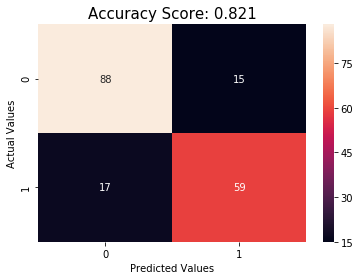

In [63]:
from sklearn.metrics import confusion_matrix as cm 

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

#### Multinomial (Softmax)

In [65]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)
egitim_dogruluk = log_reg_mnm.score(X_train, y_train)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.84
Modelin test verisindeki doğruluğu   : 0.81


C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [66]:
y_pred = log_reg_mnm.predict(X_test)

In [67]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[85, 18],
       [16, 60]], dtype=int64)

In [68]:
print("Doğruluk Oranı: %",((93+31) /179)*100)

Doğruluk Oranı: % 69.27374301675978


### 3 Kategorik ile Model

In [69]:
X = df_dummies[['Pclass', 'Age', 'Fare']]
y = df_dummies.Survived  

#### One vs Rest

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
egitim_dogruluk = lr.score(X_train, y_train)
test_dogruluk = lr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.71
Modelin test verisindeki doğruluğu   : 0.69


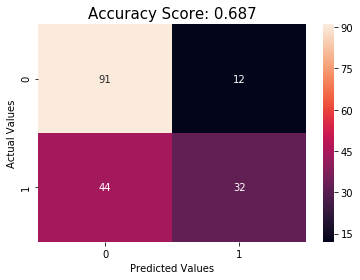

In [72]:
from sklearn.metrics import confusion_matrix as cm 

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [73]:
y_pred = lr.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
cm


array([[91, 12],
       [44, 32]], dtype=int64)

In [75]:
print("Doğruluk Oranı: %",((91+32) /179)*100)

Doğruluk Oranı: % 68.71508379888269


#### Multinomial (Softmax)

In [76]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)
egitim_dogruluk = log_reg_mnm.score(X_train, y_train)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.71
Modelin test verisindeki doğruluğu   : 0.69


In [77]:
y_pred = log_reg_mnm.predict(X_test)

In [78]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[90, 13],
       [43, 33]], dtype=int64)

In [79]:
print("Doğruluk Oranı: %",((90+33) /179)*100)

Doğruluk Oranı: % 68.71508379888269


## SONUC

Tum Kategorik degiskenlerle gelen lojistik Regresyon model tahmin gucu daha yuksektir.